In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(0)

In [16]:
data = data.drop_duplicates()

# EXPLORING RELATIONS USING PYTHON LIBRARIES

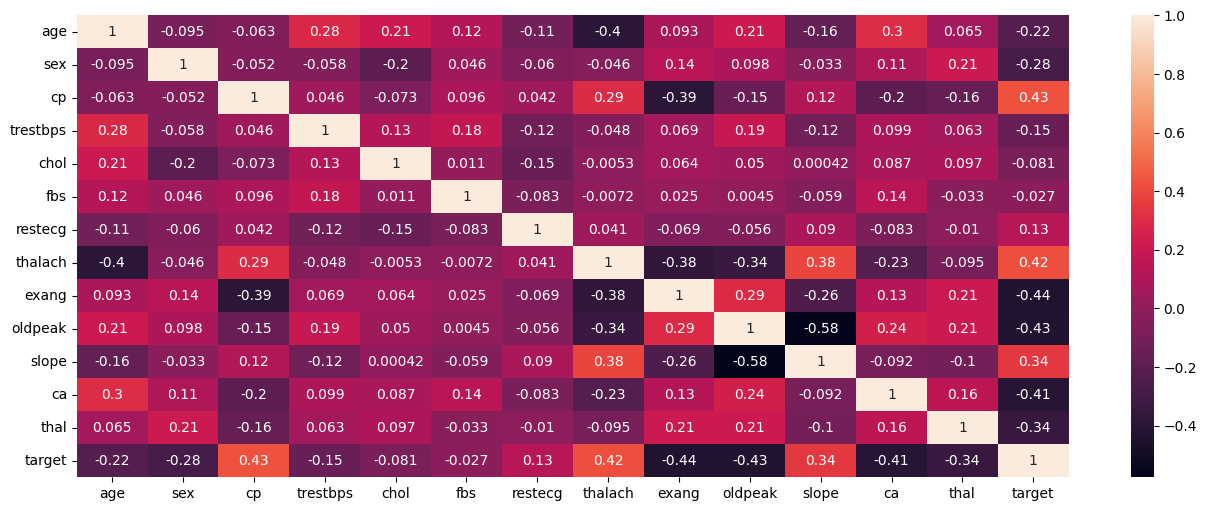

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

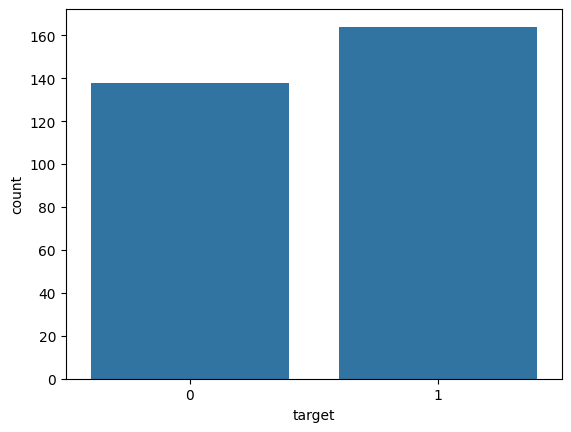

In [26]:
sns.countplot(x='target', data=data)
plt.show()

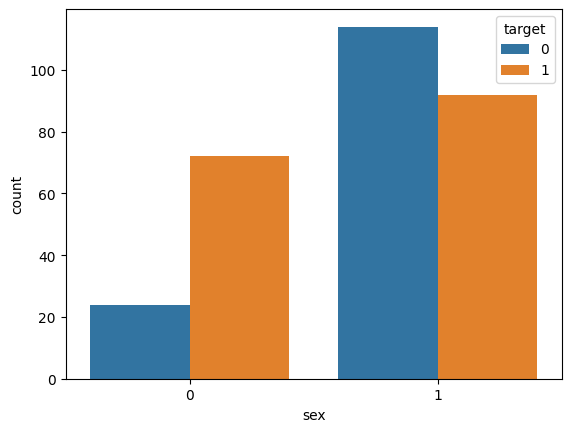

In [28]:
sns.countplot(x='sex', data=data, hue='target')
plt.show()

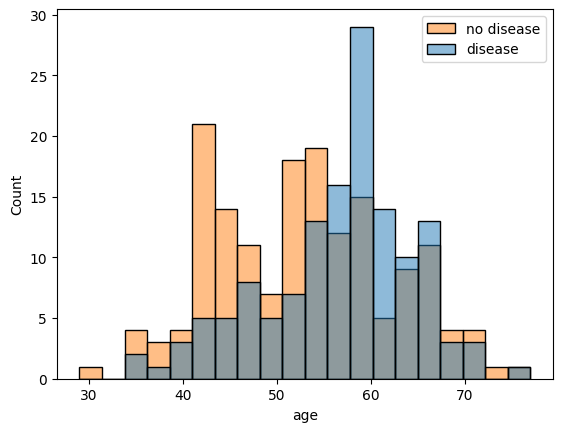

In [39]:
sns.histplot(x='age', bins=20, data=data, hue='target')
plt.legend(labels=['no disease', 'disease'])

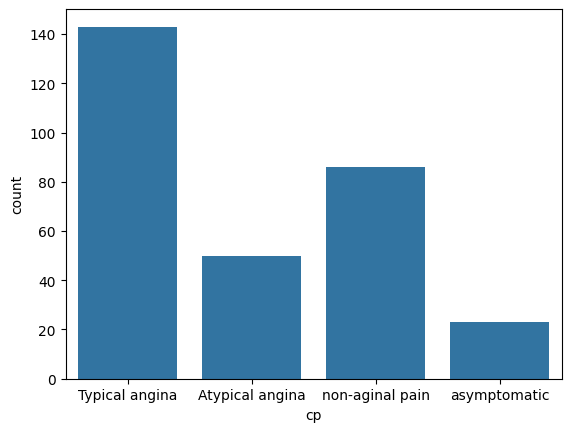

In [43]:
sns.countplot(x='cp', data=data)
plt.xticks([0,1,2,3], ['Typical angina', 'Atypical angina', 'non-aginal pain', 'asymptomatic'])
plt.show()

<Axes: >

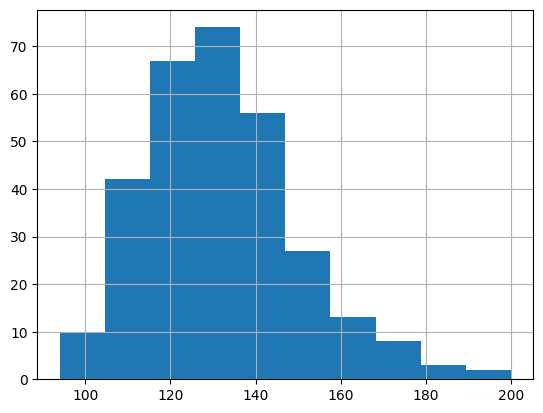

In [44]:
data['trestbps'].hist()

<Axes: >

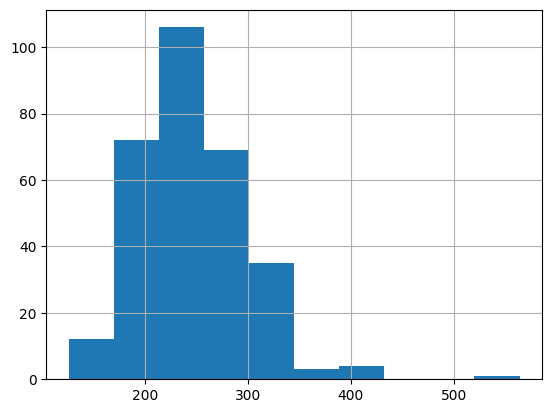

In [45]:
data['chol'].hist()

# PREDICTION MODEL using Logistic Regression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
x = data.drop(['target'], axis=1)
y = data['target']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)


In [92]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2


In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

ac = accuracy_score(y_test, y_pred)*100

print("Accuracy score using Logistic Regression", ac)

Accuracy score using Logistic Regression 78.68852459016394


# # PREDICTION MODEL using KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn_scores= []
for k in range(2,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train.values, y_train.values)
    knn_score=round(knn_classifier.score(x_test.values, y_test.values), 2)
    knn_scores.append(knn_score)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
knn_score=knn_classifier.predict(x_test)


Text(0.5, 1.0, 'KNN Scores for different K neighbouras')

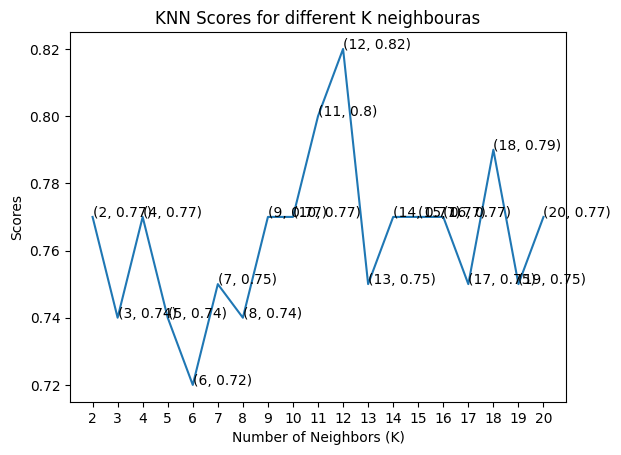

In [74]:
plt.plot([k for k in range(2, 21)], knn_scores)
for i in range(2,21):
    plt.text(i, knn_scores [i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbouras')

# # PREDICTION MODEL using Descision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier(max_features = 13, random_state=0)
dt.fit(x_train.values, y_train.values)

y_pred = dt.predict(x_test)

ac = accuracy_score(y_test, y_pred)*100

print("Accuracy score using Decision Tree", ac)

Accuracy score using Decision Tree 72.1311475409836


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Predictive System

In [93]:
input_data = (62, 0, 0, 140, 168, 0, 3.6, 0, 2, 2, 1, 2, 2)
arr = np.array(input_data)

In [94]:
prediction = lr.predict(arr.reshape(1, -1))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [95]:
if prediction == 0: 
    print("You are healthy")
else:
    print("You are not")

You are healthy
